In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# Read-in data

In [2]:
# Let's also read in SO data

so = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/so_renamed.csv')
so.head()

,LA_code,LA_name,SO_code,SO_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Straight or Heterosexual,68070
2,E06000001,Hartlepool,2,Gay or Lesbian,1121
3,E06000001,Hartlepool,3,Bisexual,784
4,E06000001,Hartlepool,4,All other sexual orientations,157


In [3]:

# Let's calculate the SO_category percentages for each local authority

so['Percentages'] = ''


for i in so.LA_code.unique():
    b = so[so.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    so.loc[b.index, 'Percentages'] = percent

In [4]:
def top10(df, column_name, n):
    
    top_dfs = []
    
    for i in df[column_name].unique():
        if i != 'Does not apply' and i != 'Straight or Heterosexual':
            b = df[df[column_name] == i]
            top_df = b.sort_values(by = 'Percentages', ascending = False)[:n]
            top_dfs.append(top_df)
        
    result_df = pd.concat(top_dfs, ignore_index = True)
        
    return result_df

In [5]:
b = top10(so, 'SO_categories', n = 5)

b

,LA_code,LA_name,SO_code,SO_categories,Observation,Percentages
0,E09000001,City of London,2,Gay or Lesbian,607,7.583708
1,E06000043,Brighton and Hove,2,Gay or Lesbian,13726,5.831744
2,E09000022,Lambeth,2,Gay or Lesbian,14291,5.313746
3,E09000019,Islington,2,Gay or Lesbian,8420,4.585407
4,E09000028,Southwark,2,Gay or Lesbian,11596,4.527282
5,E07000148,Norwich,3,Bisexual,4700,3.891921
6,E07000008,Cambridge,3,Bisexual,4769,3.822294
7,E06000043,Brighton and Hove,3,Bisexual,8916,3.788127
8,E07000178,Oxford,3,Bisexual,4953,3.622812
9,E07000138,Lincoln,3,Bisexual,2974,3.415721


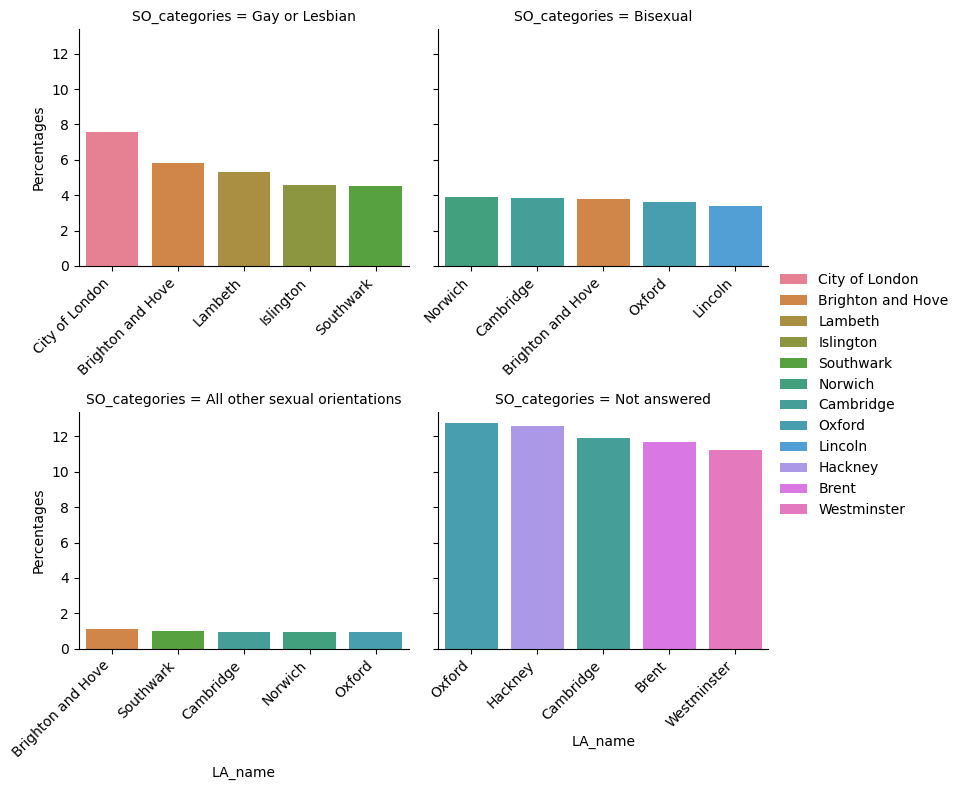

In [6]:
# Create a custom color palette
custom_palette = sns.color_palette("husl", n_colors=b['LA_name'].nunique())

# Create a color mapping dictionary
color_mapping = {LA_name: color for LA_name, color in zip(b['LA_name'].unique(), custom_palette)}
# Create a FacetGrid with subplots for each unique value in the 'SO_categories' column
g = sns.FacetGrid(b, col='SO_categories', col_wrap=2, height=4, aspect=1, sharex = False)

# Define a custom function to be used inside the FacetGrid
def custom_barplot(x, y, **kwargs):
    so_category = kwargs.pop('label')
    order = b[b['SO_categories'] == so_category]['LA_name'].unique()
    
    if len(order) > 0:
        sns.barplot(x=x, y=y, order=order, **kwargs)
    else:
        sns.barplot(x=x, y=y, **kwargs)

# Use the custom function to create bar plots for each SO_category with the correct ordering
g.map(custom_barplot, 'LA_name', 'Percentages', label='SO_categories', hue = b['LA_name'], dodge = False, palette = color_mapping)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize the chart
g.set_axis_labels("LA_name", "Percentages")
g.fig.tight_layout()
g.add_legend()

# Read-in lang dataset

In [7]:
lang = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Language_2021.csv')

In [8]:
lang.head()

,Lower Tier Local Authorities Code,Lower Tier Local Authorities,Main language (detailed) (95 categories) Code,Main language (detailed) (95 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0


In [9]:
lang = lang.rename(columns={'Lower Tier Local Authorities Code':'LA_code', 'Lower Tier Local Authorities':'LA_name', 'Main language (detailed) (95 categories)': 'ML_categories', 'Main language (detailed) (95 categories) Code': 'ML_code'})

In [10]:
lang.head()

,LA_code,LA_name,ML_code,ML_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0


# Main language

In [11]:
# Let's calculate our non-response rate...
# Probably didn't need to do this.. but meh, will clean later!

so['Non-response_rate'] = ''

for i in so.LA_code.unique():
    b = so[so.LA_code == i]
#     print(b.index)
    percent = b['Observation'].where(b['SO_code'] == 5) / b['Observation'].sum() * 100
    so.loc[b.index, 'Non-response_rate'] = percent

In [12]:
# Let's go ahead and select only a subset of our dataframe where our SO_code == 5

not_ans = so[so['SO_code'] == 5]

## Read-in region data - additional column

In [13]:
# Incorporating region - adding it as another column
# Read-in region data

region = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Local_Authority__to_Region.csv')

In [14]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

# Create a new column titled 'region' and set it to empty
not_ans['region'] = ''


for key, value in key_value_dict.items():
#     Creates a boolean series where key = True
    matching_rows = not_ans['LA_name'] == key
# Use .loc to access the row in which key = True, i.e. where the 'LA_name' column matches the current key
# We then access the region column and set it's value to match the corresponding value for our key.
    not_ans.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in


not_ans.loc[not_ans['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
not_ans.loc[not_ans['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
not_ans.loc[not_ans['LA_name'] == 'Bristol', 'region'] = 'South West'

# The rest of the LA_names that weren't filled in all belong to the Wales region
# So we subset the dataframe so we only have those rows where the region column is empty
b = not_ans[not_ans.region == '']

# Then we create a list from those unique values
la_names = b.LA_name.unique().tolist()

# We iterate through each value in the list
for i in la_names:
#     Again, we use the same method...
# Creates a boolean series where the rows in LA_name are set to True if they match i
    matching_rows = not_ans['LA_name'] == i
#     Use .loc to access the rows where LA_name matches i
# We then access the region column and set it's value to 'Wales'
    not_ans.loc[matching_rows, 'region'] = 'Wales'

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_54158/3960182255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_ans['region'] = ''


In [15]:
# Sorted not_ans dataframe values by non-response rate, and grabbed the highest 20 values by...
# setting ascending to False and slicing the dataframe 

top20 = not_ans.sort_values(by = 'Non-response_rate', ascending = False)[:20]

# Here we have it.. this can now be plotted
top20

,LA_code,LA_name,SO_code,SO_categories,Observation,Percentages,Non-response_rate,region
1121,E07000178,Oxford,5,Not answered,17411,12.735066,12.735066,South East
1727,E09000012,Hackney,5,Not answered,26384,12.595719,12.595719,London
359,E07000008,Cambridge,5,Not answered,14860,11.910105,11.910105,East of England
1685,E09000005,Brent,5,Not answered,32188,11.698644,11.698644,London
1853,E09000033,Westminster,5,Not answered,19885,11.2049,11.2049,London
1739,E09000014,Haringey,5,Not answered,23733,10.9875,10.9875,London
1775,E09000020,Kensington and Chelsea,5,Not answered,13521,10.984735,10.984735,London
1745,E09000015,Harrow,5,Not answered,22680,10.819527,10.819527,London
1805,E09000025,Newham,5,Not answered,29594,10.715747,10.715747,London
95,E06000016,Leicester,5,Not answered,30847,10.599834,10.599834,East Midlands


## Top 20 LAs by Non-Response - hued by region 

<AxesSubplot: xlabel='Non-response_rate', ylabel='LA_name'>

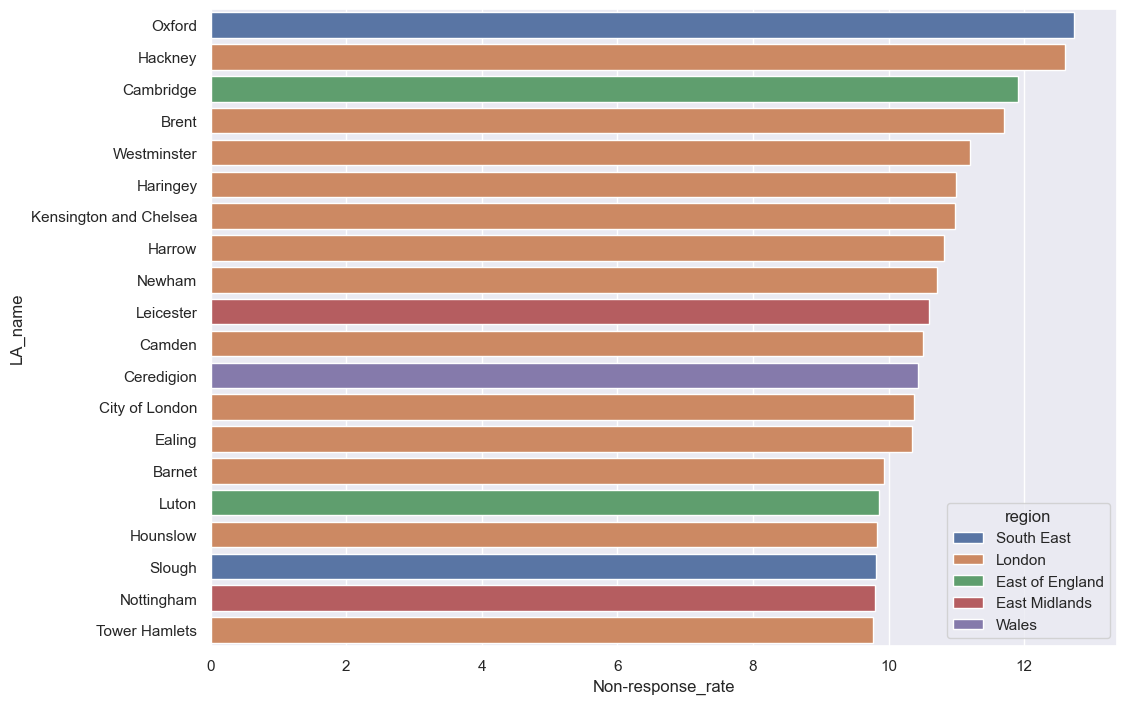

In [16]:
unique_hue_values = top20['region'].unique()
custom_palette = sns.color_palette("deep", n_colors=len(unique_hue_values))

# Create a color mapping dictionary
color_mapping = {hue_value: color for hue_value, color in zip(unique_hue_values, custom_palette)}



# Initially the graph was very small, so I set the size using figure.figsize
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Simply entered my x value and y value from my top20 dataset, and set the hue to region...

sns.barplot(x = 'Non-response_rate', y = 'LA_name', data = top20, dodge = False, hue = 'region', palette = color_mapping)

# Exploring language dataset

In [17]:
lang['Percentages'] = ''


for i in lang.LA_code.unique():
    b = lang[lang.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    lang.loc[b.index, 'Percentages'] = percent
    
lang['Non-English'] = (lang['ML_code'] != 1) & (lang['ML_code'] != -8)

In [18]:
lang2 = lang[lang['Non-English'] == True]

In [19]:
# Aggregate the data by local authority, summing the 'Observation' column
la_agg = lang2.groupby('LA_name')['Observation'].sum().reset_index()

# Merge the aggregated data with the total number of observations for each local authority
la_totals = lang.groupby('LA_name')['Observation'].sum().reset_index()
la_agg = la_agg.merge(la_totals, on='LA_name', suffixes=('', '_total'))

In [20]:
# Calculate the percentage of Non-English speakers for each local authority
la_agg['Percentage'] = (la_agg['Observation'] / la_agg['Observation_total']) * 100

In [21]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

la_agg['region'] = ''


for key, value in key_value_dict.items():
    matching_rows = la_agg['LA_name'] == key
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in

# df.loc[df['LA_name'] == [['Kingston upon Hull', 'Herefordshire'], 'region']] = ['Yorkshire and The Humber', 'West Midlands']
la_agg.loc[la_agg['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
la_agg.loc[la_agg['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
la_agg.loc[la_agg['LA_name'] == 'Bristol', 'region'] = 'South West'

b = la_agg[la_agg.region == '']
la_names = b.LA_name.unique().tolist()

for i in la_names:
    matching_rows = la_agg['LA_name'] == i
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = 'Wales'

In [22]:
# Sort the local authorities based on the percentage of Non-English speakers, in descending order
la_agg_sorted = la_agg.sort_values(by='Percentage', ascending=False)

In [23]:
top20_lang = la_agg_sorted[:30]

In [24]:
top20_lang

,LA_name,Observation,Observation_total,Percentage,region
184,Newham,116570,351029,33.208083,London
30,Brent,110404,339820,32.488965,London
85,Ealing,109501,367117,29.827276,London
126,Harrow,77406,261208,29.633855,London
155,Leicester,106800,368570,28.976856,East Midlands
138,Hounslow,78555,288181,27.258910,London
123,Haringey,69460,264238,26.286908,London
241,Slough,41438,158492,26.145168,South East
292,Tower Hamlets,80621,310304,25.981296,London
315,Westminster,52599,204223,25.755669,London


<AxesSubplot: xlabel='Percentage', ylabel='LA_name'>

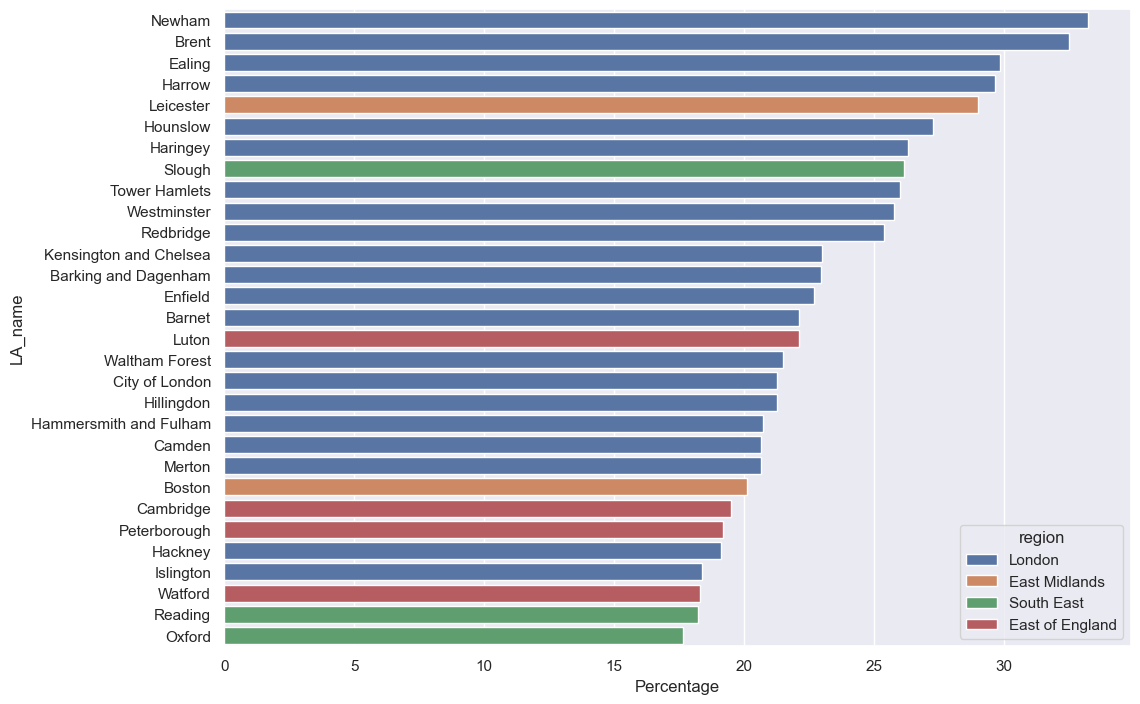

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Percentage', y = 'LA_name', hue = "region", data = top20_lang, dodge = False)
# plt.xticks(rotation=55)

In [26]:
merged_df3 = not_ans.merge(la_agg, on = ['LA_name'])

In [27]:
merged_df3

,LA_code,LA_name,SO_code,SO_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
0,E06000001,Hartlepool,5,Not answered,4554,6.097528,6.097528,North East,1875,92337,2.030605,North East
1,E06000002,Middlesbrough,5,Not answered,8298,7.282908,7.282908,North East,10510,143923,7.302516,North East
2,E06000003,Redcar and Cleveland,5,Not answered,7046,6.27192,6.27192,North East,1460,136533,1.069339,North East
3,E06000004,Stockton-on-Tees,5,Not answered,9268,5.865452,5.865452,North East,5674,196603,2.886019,North East
4,E06000005,Darlington,5,Not answered,5010,5.686332,5.686332,North East,4403,107800,4.084416,North East
...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,5,Not answered,5233,6.966837,6.966837,Wales,1318,92273,1.428370,Wales
327,W06000021,Monmouthshire,5,Not answered,5423,6.931237,6.931237,Wales,1457,92955,1.567425,Wales
328,W06000022,Newport,5,Not answered,8721,6.844133,6.844133,Wales,10035,159590,6.287988,Wales
329,W06000023,Powys,5,Not answered,9832,8.736837,8.736837,Wales,2496,133173,1.874254,Wales


## Scatterplot - relationship between NR rate and % of Non-English speakers

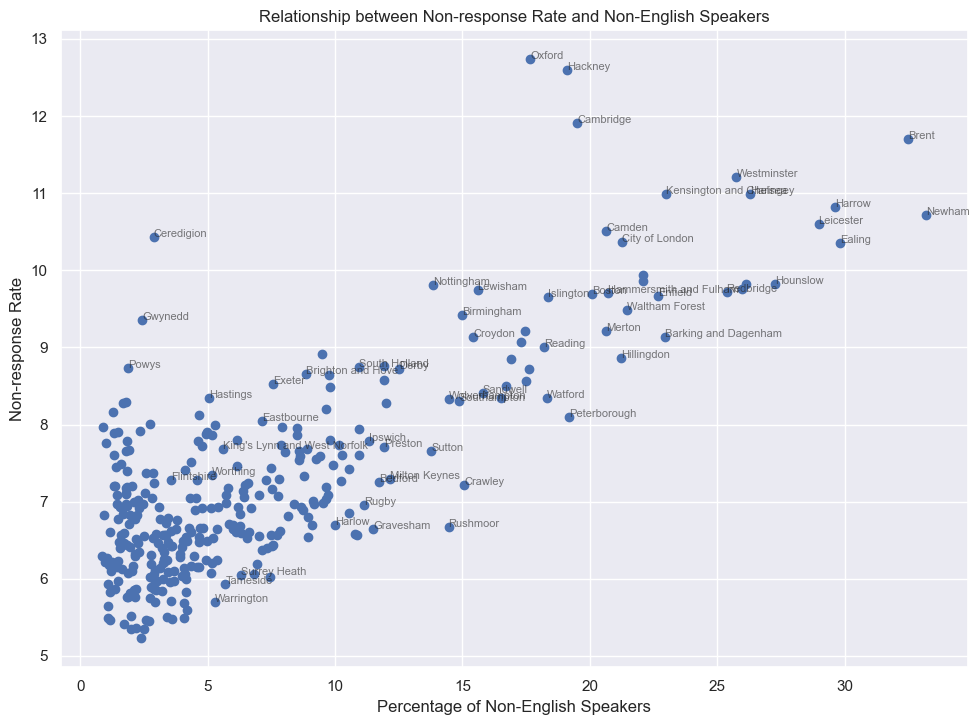

In [28]:
# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(merged_df3['Percentage'], merged_df3['Non-response_rate'])


# Find nearest neighbors
X = merged_df3[['Percentage', 'Non-response_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.4

for i, row in merged_df3.iterrows():
    if distances[i][1] >= min_distance:
        plt.annotate(row['LA_name'], (row['Percentage'], row['Non-response_rate']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')
plt.show()

In [29]:
from bokeh.models.annotations import LabelSet
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.palettes import Category10
from bokeh.io import show
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.models import Button
from bokeh.plotting import figure, curdoc

LABELS = ["Labels"]
checkbox_group = CheckboxGroup(labels=LABELS, active=[0, 1])
# urban = rural_df.Urb_Rur.unique()


source=ColumnDataSource(merged_df3)

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]

p1 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Percentage of Non-English Speakers", y_axis_label= "Non-response Rate", tooltips = tool)
output_notebook()

for region, color in zip(merged_df3.region_x.unique(), Category10[10]):
    b = merged_df3[merged_df3.region_x == region]
    p1.circle(x = 'Percentage', y = 'Non-response_rate', size = 10, alpha = 0.5, color = color, legend_label = region, muted_color = color, muted_alpha = 0.1, source = b)

labels = LabelSet(x='Percentage', y='Non-response_rate', text='LA_name',x_offset=5, y_offset=5, text_font_size = "5pt",source=ColumnDataSource(merged_df3))
tool = [
    ("Name","$LA_name"),
]

# p1.add_layout(labels)
p1.legend.location = "bottom_right"
p1.legend.click_policy="hide"
p1.legend.title = "Regions"

def callback():
    p1.add_layout(labels)


    
# add a button widget and configure with the call back
button = Button(label="Labels")
button.on_event('button_click', callback)
show(p1)

curdoc().add_root(column(button, p1))

Loading BokehJS ...

## Read-in urban vs rural dataset

In [30]:
# Read-in data from urban vs rural

rural = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Rural_Urban_2011.xlsx')
rural.head()

,LAD11CD,LAD18CD,LAD18NM,Total Rural population 2011,Urban City and Town population 2011,Urban Minor Conurbation population 2011,Urban Major Conurbation population 2011,Total Urban population 2011,Total population 2011,Hub towns (rural related) population included in Urban population 2011,Rural including hub towns (rural & rural related) population 2011,Rural including hub towns (rural & rural related) population as % of Total population 2011,RUC11CD,RUC11,Broad RUC11
0,E06000001,E06000001,Hartlepool,3173,88855,0,0,88855,92028,0,3173,3.44,4,Urban with City and Town,Predominantly Urban
1,E06000002,E06000002,Middlesbrough,957,137455,0,0,137455,138412,0,957,0.69,4,Urban with City and Town,Predominantly Urban
2,E06000003,E06000003,Redcar and Cleveland,43880,91297,0,0,91297,135177,0,43880,32.46,3,Urban with Significant Rural (rural including ...,Urban with Significant Rural
3,E06000004,E06000004,Stockton-on-Tees,7536,184074,0,0,184074,191610,0,7536,3.93,4,Urban with City and Town,Predominantly Urban
4,E06000005,E06000005,Darlington,13201,92363,0,0,92363,105564,0,13201,12.50,4,Urban with City and Town,Predominantly Urban


In [31]:
rural = rural[['LAD18NM', 'Broad RUC11']]
rural = rural.rename(columns = {"LAD18NM": "LA_name", "Broad RUC11": "Urb_Rur"})

In [32]:
rural_df = merged_df3.merge(rural, on=['LA_name'], how='left')

In [33]:
rural_df[pd.isna(rural_df['Urb_Rur'])]

,LA_code,LA_name,SO_code,SO_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y,Urb_Rur
54,E06000058,"Bournemouth, Christchurch and Poole",5,Not answered,25580,7.637896,7.637896,South West,32213,400195,8.049326,South West,NaN
55,E06000059,Dorset,5,Not answered,23103,7.177029,7.177029,South West,6790,379574,1.788847,South West,NaN
56,E06000060,Buckinghamshire,5,Not answered,31429,7.088262,7.088262,South East,38876,553074,7.029077,South East,NaN
57,E06000061,North Northamptonshire,5,Not answered,20283,7.013752,7.013752,East Midlands,32849,359519,9.136930,East Midlands,NaN
58,E06000062,West Northamptonshire,5,Not answered,25499,7.423246,7.423246,East Midlands,44949,425724,10.558249,East Midlands,NaN
237,E07000244,East Suffolk,5,Not answered,14893,7.204466,7.204466,East of England,4973,246054,2.021101,East of England,NaN
238,E07000245,West Suffolk,5,Not answered,10275,6.936615,6.936615,East of England,9769,179953,5.428640,East of England,NaN
239,E07000246,Somerset West and Taunton,5,Not answered,9865,7.513672,7.513672,South West,6837,157440,4.342607,South West,NaN
309,W06000001,Isle of Anglesey,5,Not answered,4552,7.965144,7.965144,Wales,622,68876,0.903072,Wales,NaN
310,W06000002,Gwynedd,5,Not answered,9163,9.353054,9.353054,Wales,2855,117387,2.432126,Wales,NaN


In [34]:
rural_df.shape

(331, 13)

In [35]:
for i in rural_df.LA_name.unique():
    b = rural_df[rural_df.region_x == 'Wales']
    
    rural_df.loc[b.index, 'Urb_Rur'] = 'Welsh/not specified'

In [36]:
rural_df['Urb_Rur'] = rural_df['Urb_Rur'].fillna('Not specified')


In [37]:
rural_df[rural_df.Urb_Rur == 'Not specified']

,LA_code,LA_name,SO_code,SO_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y,Urb_Rur
54,E06000058,"Bournemouth, Christchurch and Poole",5,Not answered,25580,7.637896,7.637896,South West,32213,400195,8.049326,South West,Not specified
55,E06000059,Dorset,5,Not answered,23103,7.177029,7.177029,South West,6790,379574,1.788847,South West,Not specified
56,E06000060,Buckinghamshire,5,Not answered,31429,7.088262,7.088262,South East,38876,553074,7.029077,South East,Not specified
57,E06000061,North Northamptonshire,5,Not answered,20283,7.013752,7.013752,East Midlands,32849,359519,9.136930,East Midlands,Not specified
58,E06000062,West Northamptonshire,5,Not answered,25499,7.423246,7.423246,East Midlands,44949,425724,10.558249,East Midlands,Not specified
237,E07000244,East Suffolk,5,Not answered,14893,7.204466,7.204466,East of England,4973,246054,2.021101,East of England,Not specified
238,E07000245,West Suffolk,5,Not answered,10275,6.936615,6.936615,East of England,9769,179953,5.428640,East of England,Not specified
239,E07000246,Somerset West and Taunton,5,Not answered,9865,7.513672,7.513672,South West,6837,157440,4.342607,South West,Not specified


In [38]:
rural_df.Urb_Rur.unique()

array(['Predominantly Urban', 'Urban with Significant Rural',
       'Predominantly Rural', 'Not specified', 'Welsh/not specified'],
      dtype=object)

In [39]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]

# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

regions = rural_df.region_x.unique()
urban = rural_df.Urb_Rur.unique()


p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", y_axis_label="Non-response Rate", x_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

for urban, color in zip(rural_df.Urb_Rur.unique(), Category10[10]):
    b = rural_df[rural_df.Urb_Rur == urban]
    p2.circle(x = 'Percentage', y = 'Non-response_rate', size = 10, alpha = 0.5, color = color, legend_label = str(urban), muted_color = color, muted_alpha = 0.1, source = b)

# p2.scatter("Percentage", "Non-response_rate", source = rural_df, fill_alpha = 0.5, size = 10, color = factor_cmap('Urb_Rur', Category10[10], urban), legend_field = 'Urb_Rur')

p2.legend.location = "bottom_right"
p2.legend.click_policy="hide"
p2.legend.title = "Urban-Rural classification"
show(p2)

Loading BokehJS ...

In [40]:
dsdgsdg

NameError: name 'dsdgsdg' is not defined

# Religion

In [ ]:
# Read-in dataset for religion + sexual orientation

rel = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/religion_so.xlsx')

# Let's check it out

rel.head()

In [ ]:

rel1 = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/religion_so.xlsx')
rel1.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Sexual orientation (6 categories) Code': 'SO_code', 'Sexual orientation (6 categories)': 'SO_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)
rel1 = rel1[(rel1.SO_code != -8) & (rel1.Religion_code != -8) & (rel1.Religion_code != 9)]

# Calculate the total number of survey respondents for each religion
total_by_religion = rel1.groupby('Religion_categories')['Observation'].sum().reset_index()

# Calculate the percentage of respondents for each religion
total_respondents = rel1['Observation'].sum()
total_by_religion['Percent_of_survey_respondents'] = ((total_by_religion['Observation'] / total_respondents) * 100).round(2)

# Calculate the total non-response for each religion
non_response_rel = rel1[rel1['SO_categories'] == 'Not answered']
non_response_by_religion = non_response_rel.groupby('Religion_categories')['Observation'].sum().reset_index()

# Merge the total_by_religion and non_response_by_religion DataFrames
# merged_rel = total_by_religion.merge(non_response_by_religion, on='Religion_categories', suffixes=('', '_non_response'))

total_by_religion.head(9)
# merged_rel.head()

In [ ]:
# Calculate the non-response rate for each religion
non_response_by_religion['Non_response_rate'] = ((non_response_by_religion['Observation'] / total_by_religion['Observation']) * 100).round(2)

total_non_response = non_response_by_religion['Observation'].sum()
non_response_by_religion['Contribution_to_overall_non_response_rate'] = ((non_response_by_religion['Observation'] / total_non_response) * 100).round(2)


In [ ]:
non_response_by_religion.head(9)

In [ ]:
# These column names are too wordy, let's rename them.

rel.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Sexual orientation (6 categories) Code': 'SO_code', 'Sexual orientation (6 categories)': 'SO_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)

In [ ]:
    rel.SO_categories.unique()

In [ ]:
rel.SO_code.unique()

# Total numbers - table

In [ ]:
# Nice. Lets now subset it, as we're only interested in non-response
# Let's also get rid of our empty 'Does not apply' category
# For now let's ignore our 'Non-response' for our religious category

non_resp = rel[(rel.SO_code == 5) & (rel.SO_code != -8) & (rel.Religion_code != -8) & (rel.Religion_code != 9)]

# Let's have a look...

non_resp.head(10)

In [ ]:
# Created an empty column to hold percentages of religions within each LA

non_resp['Percentages'] = ''

for i in non_resp.LA_name.unique():
    
    b = non_resp[non_resp.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    non_resp.loc[b.index, 'Percentages'] = round(perc, 2)

In [ ]:
sorted_df = non_resp.sort_values(by = ["LA_name", "Percentages"], ascending = [True, False])

sorted_df

## Shannon index

In [ ]:
# Let's now calculate the proportions
# To get better precision and not lose valuable insights I opted to round to 4 decimal places
sorted_df['Proportions'] = (sorted_df['Percentages'].astype(float) / 100).round(4)

In [ ]:
sorted_df.head()

In [ ]:
sorted_df['Calc'] = np.where(sorted_df['Proportions'] > 0, - sorted_df['Proportions'] * np.log(sorted_df['Proportions']), 0)

In [ ]:
# Created an empty column titled Shannon_idx
sorted_df['Shannon_idx'] = ''

for i in sorted_df.LA_code.unique():
    
    b = sorted_df[sorted_df.LA_code == i]
    summed = sum(b.Calc)
    
    sorted_df.loc[b.index, 'Shannon_idx'] = summed

In [ ]:
sorted_df.head()

In [ ]:
unique_shannon_df = sorted_df[['LA_name', 'Shannon_idx']].drop_duplicates(subset=['LA_name'])
unique_shannon_df.sort_values(by = 'Shannon_idx', ascending = False).head()

In [ ]:
cmap = plt.get_cmap("viridis")
cmap

In [ ]:
normalized_shannon = (sorted_df['Shannon_idx'] - sorted_df['Shannon_idx'].min()) / (sorted_df['Shannon_idx'].max() - sorted_df['Shannon_idx'].min())
normalized_shannon

In [ ]:
from bokeh.models import LogColorMapper

color_map = LogColorMapper(palette="Viridis256", low=sorted_df.Shannon_idx.min(), high=sorted_df.Shannon_idx.max())

color_map

In [ ]:
# Create a mapping between LA_code and Shannon_idx
la_code_to_shannon_idx = sorted_df.set_index('LA_code')['Shannon_idx'].to_dict()

In [ ]:
merged_df3

In [ ]:
merged_df3['Shannon_idx'] = merged_df3['LA_code'].map(la_code_to_shannon_idx)

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import ColorBar, BasicTicker, PrintfTickFormatter

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
    ("Shannon_idx", "@Shannon_idx")
]


p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Non-response Rate", y_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

p2.scatter("Percentage", "Non-response_rate", source = merged_df3, fill_alpha = 0.5, size = 10,  color={'field': 'Shannon_idx', 'transform': color_map})

color_bar = ColorBar(color_mapper=color_map,
                     title='Shannon Index',
                     ticker=BasicTicker(desired_num_ticks=5),
                     formatter=PrintfTickFormatter(format='%.2f'))

# Add the color bar to the plot
p2.add_layout(color_bar, 'right')


show(p2)

## % Non-response per religious category

In [ ]:
# Get rid of categories which are N/A and have 0 counts
# Also got rid of 'Not answered' category for religion...is this wise?
# Will artificially inflate numbers of other religious groups?

rel = rel[(rel.SO_code != -8) & (rel.Religion_code != -8) & (rel.Religion_code != 9)]


In [ ]:
# Let's calc the % of each religious group and their SO answers for each LA

rel['Group_Percentages'] = ''

for i in rel.LA_name.unique():
    
    b = rel[rel.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    rel.loc[b.index, 'Group_Percentages'] = round(perc, 2)

In [ ]:
rel.head()

In [ ]:
# Created a column which holds the total amount of people in each LA e.g. in Hartlepool there's 70898 people
# This will help me with next calculation

rel['Total_LA_counts'] = ''

for i in rel.LA_name.unique():
    
    b = rel[rel.LA_name == i]
    
    tot = b.Observation.sum()
    
    rel.loc[b.index, 'Total_LA_counts'] = tot

In [ ]:
rel.head()

### ATHEISTS

In [ ]:
# First, we subset our dataframe to only get data where religion_category == No religion

atheist = rel[(rel.Religion_categories == 'No religion')]
atheist.head(10)

In [ ]:
# So, whilst we have the % of atheists for each SO category for each individual LA...
# We now want to know the total % of atheists in each LA

atheist['No religion_%'] = ''

for i in atheist.LA_code.unique():
    
    v = atheist[atheist.LA_code == i]
    
    perc = v.Group_Percentages.sum()
    
    atheist.loc[v.index, 'No religion_%'] = perc

In [ ]:
# Now we have...
# e.g. Hartlepool, our total % of atheists is 38.76% and out of that number...
# our non-response rate for atheists in this LA is 1.61%

atheist.head()

## Total number of atheists / total number of respondents

In [ ]:
atheist.Observation.sum() / rel.Observation.sum() * 100

In [ ]:
rel.Observation.sum()

In [ ]:
# In terms of my scatterplot, I want to subset my dataframe again so that I'm only looking at non-response for GI

x = atheist[atheist.SO_categories == 'Not answered']

## NR rate for Atheists

In [ ]:
 atheist.Observation.sum()

In [ ]:
x.Observation.sum()

In [ ]:
x.Observation.sum() / atheist.Observation.sum() * 100

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Atheists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Atheists in given LA", tooltips = tool)
output_notebook()

p2.scatter("No religion_%", "Group_Percentages", source = x, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(x['No religion_%'], x.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(x['No religion_%'], x.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### CHRISTIAN

In [ ]:
def subset_rel(religion):
    a = rel[(rel.Religion_categories == religion)]
    
    a[religion+'_%'] = ''

    for i in a.LA_code.unique():
    
        v = a[a.LA_code == i]
    
        perc = v.Group_Percentages.sum()
    
        a.loc[v.index, religion+'_%'] = perc
        
        x = a[a.SO_categories == 'Not answered']
        
    return a,x

In [ ]:
christian, b = subset_rel('Christian')

## Total number of Christians / total number of respondents

In [ ]:
christian.Observation.sum() / rel.Observation.sum() * 100

## NR rate for Atheists

In [ ]:
b.Observation.sum() 

In [ ]:
b.head()

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Christians in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Christians in given LA", tooltips = tool)
output_notebook()

p2.scatter("Christian_%", "Group_Percentages", source = b, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(b['Christian_%'], b.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(b['Christian_%'], b.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### MUSLIMS

In [ ]:
muslim, c = subset_rel('Muslim')

In [ ]:
c.head()

In [ ]:
muslim.Observation.sum() / rel.Observation.sum() * 100

In [ ]:
c.Observation.sum()

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Muslims in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Muslims in given LA", tooltips = tool)
output_notebook()

p2.scatter("Muslim_%", "Group_Percentages", source = c, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(c['Muslim_%'], c.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(c['Muslim_%'], c.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### OTHER RELIGION

In [ ]:
other = rel[(rel.Religion_categories == 'Other religion')]
other.head(10)

In [ ]:
other['Other_%'] = ''

for i in other.LA_code.unique():
    
    v = other[other.LA_code == i]
    
    perc = v.Group_Percentages.sum()
    
    other.loc[v.index, 'Other_%'] = perc

In [ ]:
d = other[other.SO_categories == 'Not answered']

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Other religions in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Other religions in given LA", tooltips = tool)
output_notebook()

p2.scatter("Other_%", "Group_Percentages", source = d, fill_alpha = 0.5, size = 10)

show(p2)


In [ ]:
correlation, _ = pearsonr(d['Other_%'], d.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(d['Other_%'], d.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### BUDDHIST

In [ ]:
buddhist, e = subset_rel('Buddhist')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Buddhists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Buddhists in given LA", tooltips = tool)
output_notebook()

p2.scatter("Buddhist_%", "Group_Percentages", source = e, fill_alpha = 0.5, size = 10)

show(p2)


In [ ]:
correlation, _ = pearsonr(e['Buddhist_%'], e.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(e['Buddhist_%'], e.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### JEWISH

In [ ]:
jewish, f = subset_rel('Jewish')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Jewish people in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Jewish people in given LA", tooltips = tool)
output_notebook()

p2.scatter("Jewish_%", "Group_Percentages", source = f, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(f['Jewish_%'], f.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(f['Jewish_%'], f.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### HINDU

In [ ]:
hindu, g = subset_rel('Hindu')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Hindus in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Hindus in given LA", tooltips = tool)
output_notebook()

p2.scatter("Hindu_%", "Group_Percentages", source = g, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(g["Hindu_%"], g["Group_Percentages"])

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(g["Hindu_%"], g["Group_Percentages"])

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### SIKH

In [ ]:
sikh, h = subset_rel('Sikh')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Sikhs in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Sikhs in given LA", tooltips = tool)
output_notebook()

p2.scatter("Sikh_%", "Group_Percentages", source = h, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(h["Sikh_%"], h["Group_Percentages"])

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(h["Sikh_%"], h["Group_Percentages"])

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

In [ ]:
# List of DataFrames and their corresponding suffixes
dataframes = [(x, '_Atheist'), (b, '_Christian'), (c, '_Muslim'), (d, '_Other'), (e, '_Buddhist'), (f, '_Jewish'), (g, '_Hindu'), (h, '_Sikh')]

# Merge the DataFrames one by one
merged_df = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df = merged_df.merge(df, on=['LA_code', 'LA_name', 'SO_code', 'SO_categories'], suffixes=('', suffix))
    merged_df = merged_df.rename(columns={'Total_counts': f'Total_counts{suffix}', 'Total': f'Total{suffix}'})

In [ ]:
merged_df = merged_df.rename(columns = {'Group_Percentages': 'Group_Percentages_No religion'})

In [ ]:
merged_df

In [ ]:
merged_df.columns

In [ ]:
# Let's check it works...

from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Sikhs in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Sikhs in given LA", tooltips = tool)
output_notebook()

p2.scatter("No religion_%", "Group_Percentages_No religion", source = merged_df, fill_alpha = 0.5, size = 10)

show(p2)

# Success!

In [ ]:
# Dfs for scatterplots - will be imported into SO_outputs notebook

non_response_by_religion.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/nr_totals_SO.csv', index = False)
total_by_religion.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/gen_totals_SO.csv', index = False)
merged_df3.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_lang_SO.csv', index = False)
merged_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_religion_SO.csv', index = False)
rural_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/urban_rural_SO.csv', index = False)